### Nearest Neighbors

The classes in sklearn.neighbors can handle either <b>NumPy arrays</b> or <b>scipy.sparse matrices</b> as input. For <b>dense matrices</b>, a large number of <b>possible distance metrics</b> are supported. For </b>sparse matrices</b>, arbitrary <b>Minkowski metrics</b> are supported for searches.

<b>Unsupervised Nearest Neighbors</b>\
Finding the nearest neighbors:

In [2]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors = 2, algorithm = 'ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
indices, distances

(array([[0, 1],
        [1, 0],
        [2, 1],
        [3, 4],
        [4, 3],
        [5, 4]]),
 array([[0.        , 1.        ],
        [0.        , 1.        ],
        [0.        , 1.41421356],
        [0.        , 1.        ],
        [0.        , 1.        ],
        [0.        , 1.41421356]]))

Because the query set matches the training set, the nearest neighbor of each point is the point itself, at a distance of zero. It is also possible to efficiently produce a sparse graph showing the connections between neighboring points:

In [3]:
nbrs.kneighbors_graph(X).toarray()

array([[1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1.]])

The dataset is structured such that points nearby in index order are nearby in parameter space, leading to an approximately block-diagonal matrix of K-nearest neighbors. Such a sparse graph is useful in a variety of circumstances which make use of spatial relationships between points for unsupervised learning: in particular, see Isomap, LocallyLinearEmbedding, and SpectralClustering.

<b>KDTree and BallTree Classes</b>

In [4]:
from sklearn.neighbors import KDTree
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
kdt = KDTree(X, leaf_size = 30, metric = 'euclidean')
kdt.query(X, k = 2, return_distance = False)

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]])

Note: For a list of available metrics, see the documentation of the DistanceMetric class and the metrics listed in sklearn.metrics.pairwise.PAIRWISE_DISTANCE_FUNCTIONS. Note that the “cosine” metric uses cosine_distances.

<b>Nearest Neighbors Classifiers:</b>

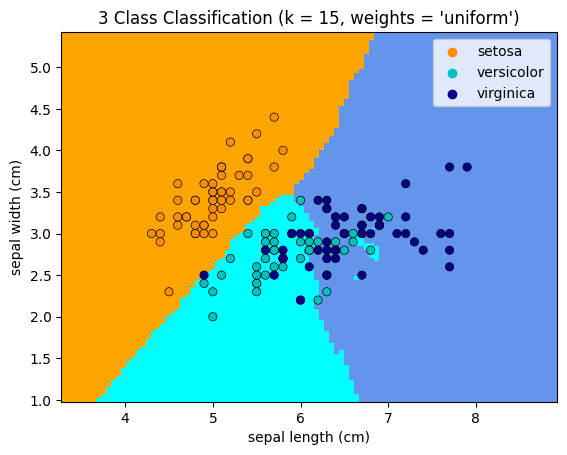

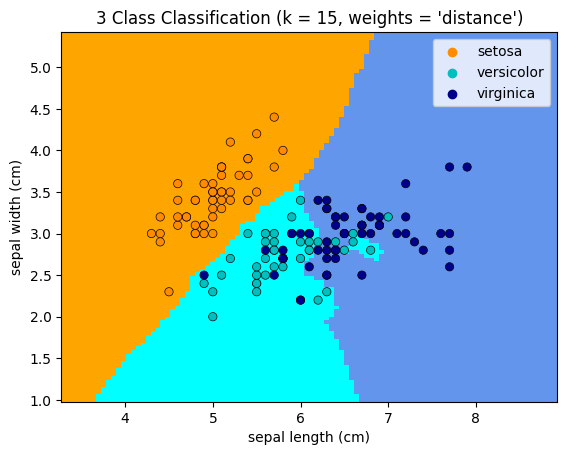

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

n_neighbors = 15

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

cmap_light = ListedColormap(["orange","cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    
    # Creating an instance of Neighbours Classifier and fit the data
    
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights = weights)
    clf.fit(X, y)
    
    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
                                                clf, 
                                                X, 
                                                cmap = cmap_light,
                                                ax = ax,
                                                response_method = "predict",
                                                plot_method = "pcolormesh",
                                                xlabel = iris.feature_names[0],
                                                ylabel = iris.feature_names[1],
                                                shading = "auto",
                                          )
    
    # Plot the training points
    
    sns.scatterplot(
                    x = X[:, 0], 
                    y = X[:, 1],
                    hue = iris.target_names[y],
                    palette = cmap_bold,
                    alpha = 1.0,
                    edgecolor = "black",
                    )
    
    plt.title("3 Class Classification (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.show()

<b>Nearest Neighbors Regression:</b>

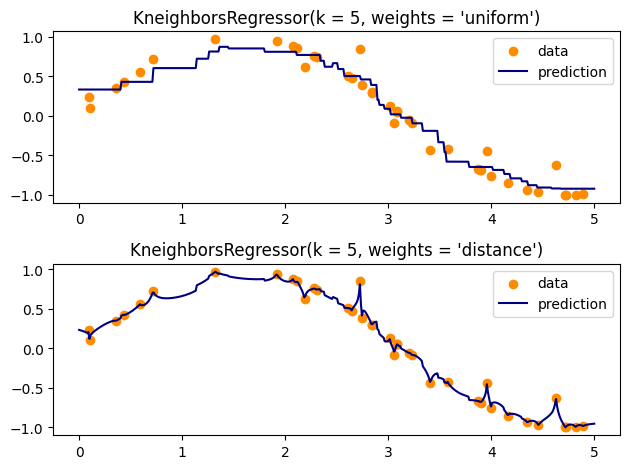

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

# Generating Sample Data

np.random.seed(0)
X = np.sort(5*np.random.rand(40, 1), axis = 0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Adding noise to the target 

y[::5] += 1 * (0.5 -np.random.rand(8))

# Fit Regression Model 

n_neighbors = 5

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights = weights)
    y_ = knn.fit(X, y).predict(T)
    
    plt.subplot(2, 1, i+1)
    plt.scatter(X, y, color = "darkorange", label = "data")
    plt.plot(T, y_, color = "navy", label = "prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KneighborsRegressor(k = %i, weights = '%s')" %(n_neighbors, weights))
    
plt.tight_layout()
plt.show()


<b>Nearest Neighbors Transformers:</b>

Many scikit-learn estimators rely on nearest neighbors: Several classifiers and regressors such as KNeighborsClassifier and KNeighborsRegressor, but also some clustering methods such as DBSCAN and SpectralClustering, and some manifold embeddings such as TSNE and Isomap. 

All these estimators can compute internally the nearest neighbors, but most of them also accept precomputed nearest neighbors sparse graph, as given by kneighbors_graph and radius_neighbors_graph. With mode mode = 'connectivity', these functions return a binary adjacency sparse graph as required, for instance, in SpectralClustering. Whereas with mode = 'distance', they return a distance sparse graph as required, for instance, in DBSCAN. 

To include these functions in a scikit-learn pipeline, one can also use the corresponding classes KNeighborsTransformer and RadiusNeighborsTransformer.

First, the precomputed graph can be re-used multiple times, for instance while varying a parameter of the estimator. This can be done manually by the user, or using the caching properties of the scikit-learn pipeline:

In [1]:
import tempfile
from sklearn.manifold import Isomap
from sklearn.neighbors import KNeighborsTransformer
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression

cache_path = tempfile.gettempdir() # using a temporary folder

X, _ = make_regression(n_samples = 50, n_features = 25, random_state = 0)

estimator = make_pipeline(
                            KNeighborsTransformer(mode = 'distance'),
                            Isomap(n_components = 3, metric = 'precomputed'),
                            memory = cache_path
                         )

X_embedded = estimator.fit_transform(X)
X_embedded.shape

(50, 3)

Second, precomputing the graph can give finer control on the nearest neighbors estimation, for instance enabling multiprocessing though the parameter n_jobs, which might not be available in all estimators.

Finally, the precomputation can be performed by custom estimators to use different implementations, such as approximate nearest neighbors methods, or implementation with special data types. The precomputed neighbors sparse graph needs to be formatted as in radius_neighbors_graph output:
1. A CSR matrix (although COO, CSC or LIL will be accepted).
2. Only explicitly store nearest neighborhoods of each sample with respect to the training data. This should include those at 0 distance from a query point, including the matrix diagonal when computing the nearest neighborhoods between the training data and itself.
3. Each row’s data should store the distance in increasing order (optional. Unsorted data will be stable-sorted, adding a computational overhead).
4. All values in data should be non-negative.
5. There should be no duplicate indices in any row.
6. If the algorithm being passed the precomputed matrix uses k nearest neighbors (as opposed to radius neighborhood), at least k neighbors must be stored in each row (or k+1, as explained in the following note).

<b>Neighbor Components Analysis</b> x <b>K Neighbors Classifier</b>

In [4]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline 

X, y = load_iris(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.7, random_state = 42)
nca = NeighborhoodComponentsAnalysis(random_state = 42)
knn = KNeighborsClassifier(n_neighbors = 3)

nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)

Pipeline(steps=[('nca', NeighborhoodComponentsAnalysis(random_state=42)),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [5]:
print(nca_pipe.score(X_test, y_test))

0.9619047619047619


<b>Comparing Nearest Neighbors with and without Neighborhood Components Analysis:</b> \
Plotting the class decision boundaries given by a Nearest Neighbors classifier when using the Euclidean distance on the original features, versus using the Euclidean distance after the transformation learned by Neighborhood Components Analysis. The latter aims to find a linear transformation that maximises the (stochastic) nearest neighbor classification accuracy on the training set.

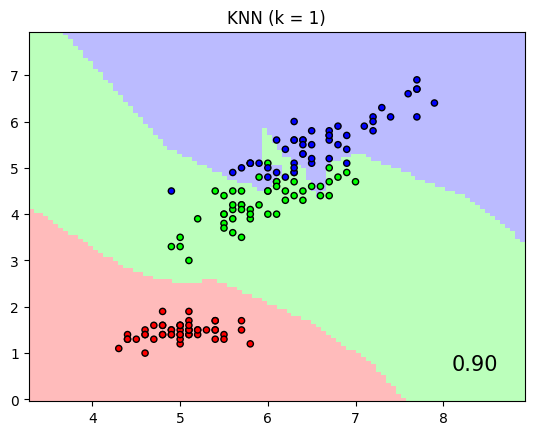

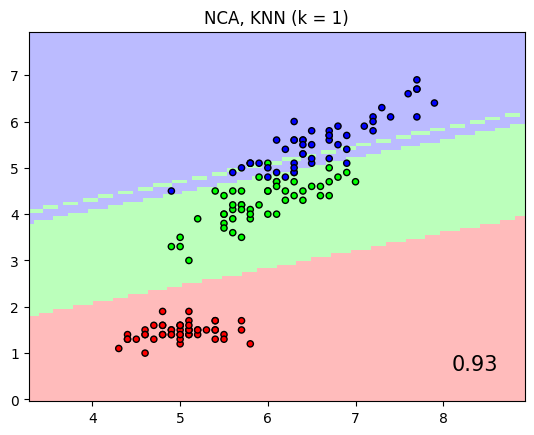

In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline
from sklearn.inspection import DecisionBoundaryDisplay

n_neighbors = 1

dataset = datasets.load_iris()
X, y = dataset.data, dataset.target

# Only take two features, could avoid this ugly slicing by using a two-dim dataset
X = X[:, [0, 2]]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.7, random_state=42)
h = 0.05  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

names = ["KNN", "NCA, KNN"]

classifiers = [
    Pipeline(
        [
            ("scaler", StandardScaler()),
            ("knn", KNeighborsClassifier(n_neighbors=n_neighbors)),
        ]
    ),
    Pipeline(
        [
            ("scaler", StandardScaler()),
            ("nca", NeighborhoodComponentsAnalysis()),
            ("knn", KNeighborsClassifier(n_neighbors=n_neighbors)),
        ]
    ),
]

for name, clf in zip(names, classifiers):

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        alpha=0.8,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
    )

    # Plot also the training and testing points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=20)
    plt.title("{} (k = {})".format(name, n_neighbors))
    plt.text(
        0.9,
        0.1,
        "{:.2f}".format(score),
        size=15,
        ha="center",
        va="center",
        transform=plt.gca().transAxes,
    )

plt.show()

<b>Dimensionality Reduction with Neighborhood Components Analysis</b> 

This example compares different <b>(linear) dimensionality reduction methods</b> applied on the <b>Digits data set</b>. The data set contains images of digits from 0 to 9 with approximately 180 samples of each class. Each image is of dimension 8x8 = 64, and is reduced to a two-dimensional data point.

<b>Principal Component Analysis (PCA)</b> applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. Here we plot the different samples on the 2 first principal components.

<b>Linear Discriminant Analysis (LDA)</b> tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.

<b>Neighborhood Components Analysis (NCA)</b> tries to find a feature space such that a stochastic nearest neighbor algorithm will give the best accuracy. Like LDA, it is a supervised method.

One can see that NCA enforces a clustering of the data that is visually meaningful despite the large reduction in dimension.

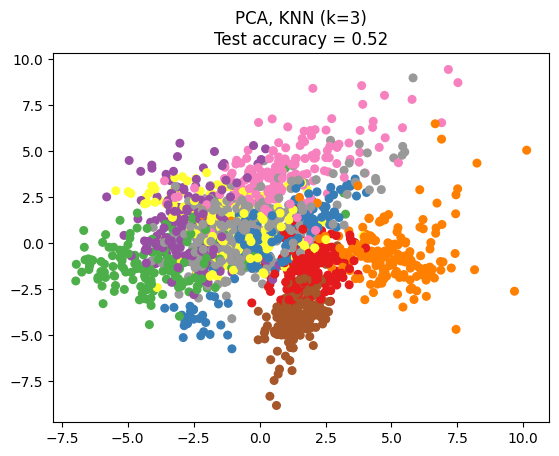

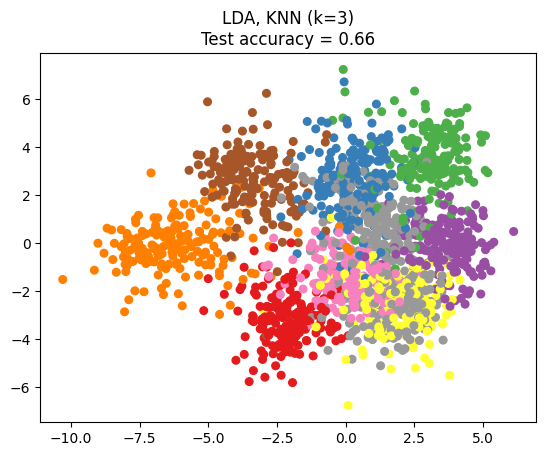

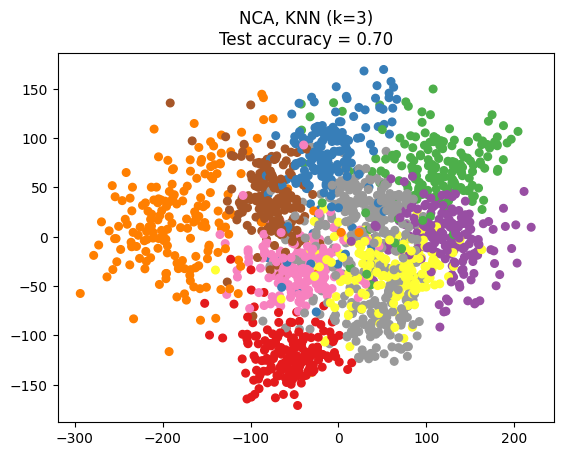

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

n_neighbors = 3
random_state = 0

# Load Digits dataset
X, y = datasets.load_digits(return_X_y=True)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=random_state)

dim = len(X[0])
n_classes = len(np.unique(y))

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2))

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(
                        StandardScaler(),
                        NeighborhoodComponentsAnalysis(n_components=2, random_state=random_state),
                   )

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Make a list of the methods to be compared
dim_reduction_methods = [("PCA", pca), ("LDA", lda), ("NCA", nca)]

# plt.figure()
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap="Set1")
    plt.title(
        "{}, KNN (k={})\nTest accuracy = {:.2f}".format(name, n_neighbors, acc_knn)
    )
plt.show()